# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from pprint import pprint

# Import OpenWeather API Key
from api_keys import api_key
api_key = f'&APPID={api_key}'

#base url for API call
url = 'http://api.openweathermap.org/data/2.5/weather?q=' + api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Base url for API call
weather_url = 'http://api.openweathermap.org/data/2.5/weather?q=' 
    
New_Cities = []
Clouds = []
Countries = []
Humidities = []
Latitudes = []
Longitudes = []
Max_Temperatures = []
Wind_Speeds = []
Dates = []

for city in cities:
        
    Weather = requests.get(weather_url + city + api_key).json()
        #pprint(Weather)
    
    if Weather['cod'] == 200:
        
        New_Cities.append(city)
            
        Cloudiness = Weather['clouds']['all']
        Clouds.append(Cloudiness)
    
        Country = Weather['sys']['country']
        Countries.append(Country)
    
        Humidity = Weather['main']['humidity']
        Humidities.append(Humidity)
    
        Lat = Weather['coord']['lat']
        Latitudes.append(Lat)
    
        Lng = Weather['coord']['lon']
        Longitudes.append(Lng)
    
        Max_Temp = Weather['main']['temp_max']
        Max_Temperatures.append(Max_Temp)
    
        Wind_Speed = Weather['wind']['speed']
        Wind_Speeds.append(Wind_Speed)
    
        Date = Weather['dt']
        Dates.append(Date)
        
        
print('Data Retreival Complete')

Data Retreival Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
print(f"cities: {len(New_Cities)}")
print(f"Clouds: {len(Clouds)}")
print(f"Countries: {len(Countries)}")
print(f"Humidities: {len(Humidities)}")
print(f"Latitudes: {len(Latitudes)}")
print(f"Longitudes: {len(Longitudes)}")
print(f"Max Temperatures: {len(Max_Temperatures)}")
print(f"Wind Speeds: {len(Wind_Speeds)}")
print(f"Dates: {len(Dates)}")

cities: 531
Clouds: 531
Countries: 531
Humidities: 531
Latitudes: 531
Longitudes: 531
Max Temperatures: 531
Wind Speeds: 531
Dates: 531


In [15]:
Weather_DF = pd.DataFrame({'City': New_Cities,
                           'Cloudiness': Clouds,
                           'Country': Countries,
                           'Date' : Date,
                           'Humidity': Humidities,
                           'Lat': Latitudes,
                           'Lng': Longitudes,
                           'Max Temp': Max_Temperatures,
                           'Wind Speed': Wind_Speeds})

Weather_DF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1571081412,64,-33.64,115.35,278.15,4.466
1,pisco,42,PE,1571081412,30,-13.71,-76.20,295.15,7.200
2,sesimbra,20,PT,1571081412,63,38.45,-9.10,289.82,2.100
3,timizart,23,DZ,1571081412,74,36.80,4.25,297.50,5.962
4,butaritari,100,KI,1571081412,62,3.07,172.79,302.50,3.084


In [16]:
# Extracting columns needed for plotting
latitudes = Weather_DF['Lat']
max_temperatures = Weather_DF['Max Temp']
humidity = Weather_DF['Humidity']
cloudiness = Weather_DF['Cloudiness']
wind_speed = Weather_DF['Wind Speed']

In [17]:
# Export Data to output data CSV file

Weather_DF.to_csv(output_data_file, index_label='City_ID')

In [18]:
# City Count to verify we have 500 cities

Weather_DF.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

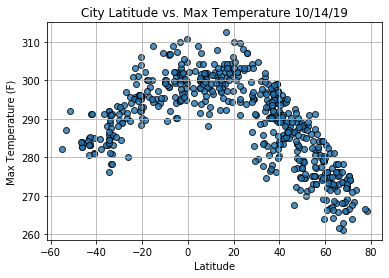

In [19]:
# plot scatter plot 'Latitude vs. Temperature Plot'
plt.scatter(latitudes, max_temperatures, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Plot Title
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'))

# Plot X-Axis label
plt.xlabel('Latitude')

#Plot Y-Axis label
plt.ylabel('Max Temperature (F)')

#Plot grid lines
plt.grid(True)

# Save scatter plot
plt.savefig('output_data/Figure_1.png')

# Show scatter plot
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

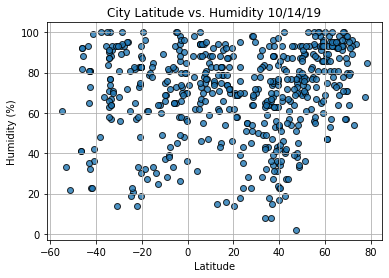

In [23]:
# plot scatter plot 'Latitude vs. Temperature Plot'
plt.scatter(latitudes, humidity, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Plot Title
plt.title('City Latitude vs. Humidity ' + time.strftime('%x'))

# Plot X-Axis label
plt.xlabel('Latitude')

#Plot Y-Axis label
plt.ylabel('Humidity (%)')

#Plot grid lines
plt.grid(True)

# Save scatter plot
plt.savefig('output_data/Figure_2.png')

# Show scatter plot
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

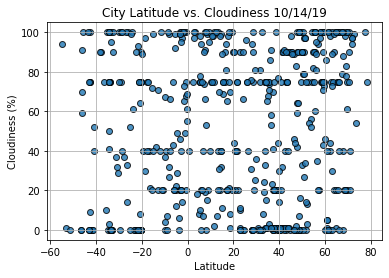

In [22]:
# plot scatter plot 'Latitude vs. Temperature Plot'
plt.scatter(latitudes, cloudiness, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Plot Title
plt.title('City Latitude vs. Cloudiness ' + time.strftime('%x'))

# Plot X-Axis label
plt.xlabel('Latitude')

#Plot Y-Axis label
plt.ylabel('Cloudiness (%)')

#Plot grid lines
plt.grid(True)

# Save scatter plot
plt.savefig('output_data/Figure_3.png')

# Show scatter plot
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

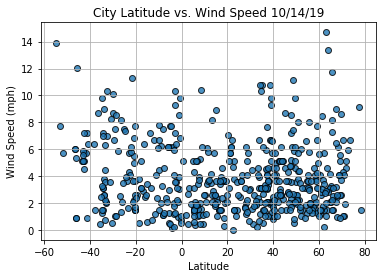

In [24]:
# plot scatter plot 'Latitude vs. Temperature Plot'
plt.scatter(latitudes, wind_speed, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Plot Title
plt.title('City Latitude vs. Wind Speed ' + time.strftime('%x'))

# Plot X-Axis label
plt.xlabel('Latitude')

#Plot Y-Axis label
plt.ylabel('Wind Speed (mph)')

#Plot grid lines
plt.grid(True)

# Save scatter plot
plt.savefig('output_data/Figure_4.png')

# Show scatter plot
plt.show